# Descripción de las variables del dataset de clima

- Date: fecha de la observación meteorológica.
- Location: estación meteorológica o ciudad donde se registraron los datos.
- MinTemp: temperatura mínima registrada durante el día (°C).
- MaxTemp: temperatura máxima registrada durante el día (°C).
- Rainfall: cantidad de lluvia caída en 24 horas (mm).
- Evaporation: cantidad de agua evaporada en 24 horas (mm), medida en tanque de evaporación.
- Sunshine: número de horas de insolación efectiva durante el día.
- WindGustDir: dirección del viento más fuerte registrado en el día (puntos cardinales).
- WindGustSpeed: velocidad del viento más fuerte registrado en el día (km/h).
- WindDir9am: dirección del viento registrada a las 9:00 horas.
- WindDir3pm: dirección del viento registrada a las 15:00 horas.
- WindSpeed9am: velocidad del viento registrada a las 9:00 horas (km/h).
- WindSpeed3pm: velocidad del viento registrada a las 15:00 horas (km/h).
- Humidity9am: humedad relativa del aire a las 9:00 horas (%).
- Humidity3pm: humedad relativa del aire a las 15:00 horas (%).
- Pressure9am: presión atmosférica a nivel del mar medida a las 9:00 horas (hPa).
- Pressure3pm: presión atmosférica a nivel del mar medida a las 15:00 horas (hPa).
- Cloud9am: cobertura nubosa estimada a las 9:00 horas (octas, escala de 0 a 8).
- Cloud3pm: cobertura nubosa estimada a las 15:00 horas (octas, escala de 0 a 8).
- Temp9am: temperatura del aire a las 9:00 horas (°C).
- Temp3pm: temperatura del aire a las 15:00 horas (°C).
- RainToday: variable binaria que indica si llovió en las 24 horas previas (Yes/No).
- RainTomorrow: variable binaria que indica si llovió en las 24 horas siguientes (Yes/No). Esta es la variable objetivo a predecir en la regresión logística.

# EDA

In [91]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

from geopy.geocoders import Nominatim
import time

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler   # u otros scalers
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV,SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import KNNImputer
from sklearn.linear_model import SGDRegressor
sns.set_theme()

In [92]:
df = pd.read_csv("weatherAUS.csv")

In [93]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [95]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Hay 3267 valores faltantes en la variable objetivo. 

In [96]:
# Hay una gran cantidad de nulos.
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [97]:
# No hay duplicados en el dataset
df.duplicated().sum()

np.int64(0)

Se observan ciudades con nombres repetidos (SydneyAirport,MelbourneAirport).

In [98]:
# Que es PearceRAAF
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [99]:
df_copy = df.copy()

ta desbalaceao

In [100]:
df_copy.RainTomorrow.value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [101]:
df_copy["Location"].unique().shape

(49,)

In [102]:
coords_dict = {
    'Albury': (-36.073773, 146.913526),
    'Badgerys Creek': (-33.883145, 150.742466),
    'Cobar': (-31.966663, 145.304505),
    'Coffs Harbour': (-30.298600, 153.109412),
    'Moree': (-29.461720, 149.840715),
    'Newcastle': (-32.919295, 151.779535),
    'Norah Head': (-33.281667, 151.567778),
    'Norfolk Island': (-29.032804, 167.948314),
    'Penrith': (-33.751195, 150.694171),
    'Richmond': (-37.807450, 144.990721),
    'Sydney': (-33.869844, 151.208285),
    'Wagga Wagga': (-35.115000, 147.367778),
    'Williamtown': (-32.815000, 151.842778),
    'Wollongong': (-34.424394, 150.893850),
    'Canberra': (-35.297591, 149.101268),
    'Tuggeranong': (-35.420977, 149.092134),
    'Mount Ginini': (-35.529744, 148.772540),
    'Ballarat': (-37.562301, 143.860565),
    'Bendigo': (-36.759018, 144.282672),
    'Sale': (-38.109446, 147.065672),
    'Melbourne': (-37.814245, 144.963173),
    'Mildura': (-34.195274, 142.150315),
    'Nhil': (-35.432540, 141.283386),
    'Portland': (-38.345623, 141.604230),
    'Watsonia': (-37.710947, 145.083781),
    'Dartmoor': (-37.895212, 141.267943),
    'Brisbane': (-27.468962, 153.023501),
    'Cairns': (-16.920666, 145.772185),
    'GoldCoast': (-28.080500, 153.430919),
    'Townsville': (-19.256939, 146.823954),
    'Adelaide': (-34.928181, 138.599931),
    'Mount Gambier': (-37.830139, 140.784263),
    'Nuriootpa': (-34.469335, 138.993901),
    'Woomera': (-31.199914, 136.825353),
    'Albany': (-35.024782, 117.883608),
    'Witchcliffe': (-34.026335, 115.100477),
    'Pearce RAAF': (-31.673960, 116.017544),
    'Perth': (-31.955897, 115.860578),
    'Salmon Gums': (-32.981517, 121.644079),
    'Walpole': (-34.977680, 116.731006),
    'Hobart': (-42.882509, 147.328123),
    'Launceston': (-41.434081, 147.137350),
    'Alice Springs': (-23.698388, 133.881289),
    'Darwin': (-12.460440, 130.841047),
    'Katherine': (-14.464616, 132.263599),
    'Uluru': (-25.345554, 131.036961)
}


In [103]:
ciudades_corregidas = {
 'BadgerysCreek': 'Badgerys Creek',
 'CoffsHarbour': 'Coffs Harbour',
 'NorahHead': 'Norah Head',
 'NorfolkIsland': 'Norfolk Island',
 'WaggaWagga': 'Wagga Wagga',
 'MountGinini': 'Mount Ginini',
 'Brisbane': 'Brisbane',
 'MountGambier': 'Mount Gambier',
 'PearceRAAF': 'Pearce RAAF',
 'SalmonGums': 'Salmon Gums',
 'AliceSprings': 'Alice Springs',
 "MelbourneAirport":"Melbourne",
 "SydneyAirport":"Sydney",
 "PerthAirport":"Perth"
}

In [104]:
df_copy['Location'] = df_copy['Location'].replace(ciudades_corregidas)

In [105]:
df_copy["Location"].unique()

array(['Albury', 'Badgerys Creek', 'Cobar', 'Coffs Harbour', 'Moree',
       'Newcastle', 'Norah Head', 'Norfolk Island', 'Penrith', 'Richmond',
       'Sydney', 'Wagga Wagga', 'Williamtown', 'Wollongong', 'Canberra',
       'Tuggeranong', 'Mount Ginini', 'Ballarat', 'Bendigo', 'Sale',
       'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor',
       'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide',
       'Mount Gambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe',
       'Pearce RAAF', 'Perth', 'Salmon Gums', 'Walpole', 'Hobart',
       'Launceston', 'Alice Springs', 'Darwin', 'Katherine', 'Uluru'],
      dtype=object)

In [106]:
df_copy['Latitude'] = df_copy['Location'].map(lambda x: coords_dict[x][0])
df_copy['Longitude'] = df_copy['Location'].map(lambda x: coords_dict[x][1])

In [107]:
df_copy.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Latitude             0
Longitude            0
dtype: int64

In [108]:
# Eliminación de NAN en columna objetivo.
df_copy = df_copy.dropna(subset=["RainTomorrow"])

In [109]:
# --- 1. Leer el shapefile ---
path_shp = "shapefiles"  # ← Cambiá por tu ruta real
gdf_clusters = gpd.read_file(path_shp)

# --- 2. Convertir tus ciudades en un GeoDataFrame ---
df_ciudades = df_copy[['Location', 'Latitude', 'Longitude']].drop_duplicates().reset_index(drop=True)

# Crear geometrías tipo Point a partir de lat/long
gdf_ciudades = gpd.GeoDataFrame(
    df_ciudades,
    geometry=gpd.points_from_xy(df_ciudades.Longitude, df_ciudades.Latitude),
    crs="EPSG:4326"  # Sistema de coordenadas WGS84 (lat/long)
)

# --- 3. Asegurar que ambos usan el mismo CRS ---
if gdf_clusters.crs != gdf_ciudades.crs:
    gdf_clusters = gdf_clusters.to_crs(gdf_ciudades.crs)

# --- 4. Hacer el "spatial join" ---
gdf_resultado = gpd.sjoin(gdf_ciudades, gdf_clusters, how="left", predicate="within")

# Si querés devolverlo a un DataFrame normal:
df_ciudades_regiones = pd.DataFrame(gdf_resultado.drop(columns="geometry"))

In [126]:
df_ciudades_regiones.head()

,Location,Latitude,Longitude,index_right,OBJECTID,Shape_Leng,Shape_Area,code,label
0,Albury,-36.073773,146.913526,2.0,4.0,45.869349,45.299310,MB,Murray Basin
1,Badgerys Creek,-33.883145,150.742466,1.0,2.0,56.117544,34.176299,EC,East Coast
2,Cobar,-31.966663,145.304505,4.0,6.0,137.457553,407.116072,R,Rangelands
3,Coffs Harbour,-30.298600,153.109412,1.0,2.0,56.117544,34.176299,EC,East Coast
4,Moree,-29.461720,149.840715,0.0,1.0,43.872364,28.309947,CS,Central Slopes


In [110]:
# Asignar manualmente la región para 'Norfolk Island'
df_ciudades_regiones.loc[df_ciudades_regiones['Location'] == 'Norfolk Island', 'label'] = 'East Coast'

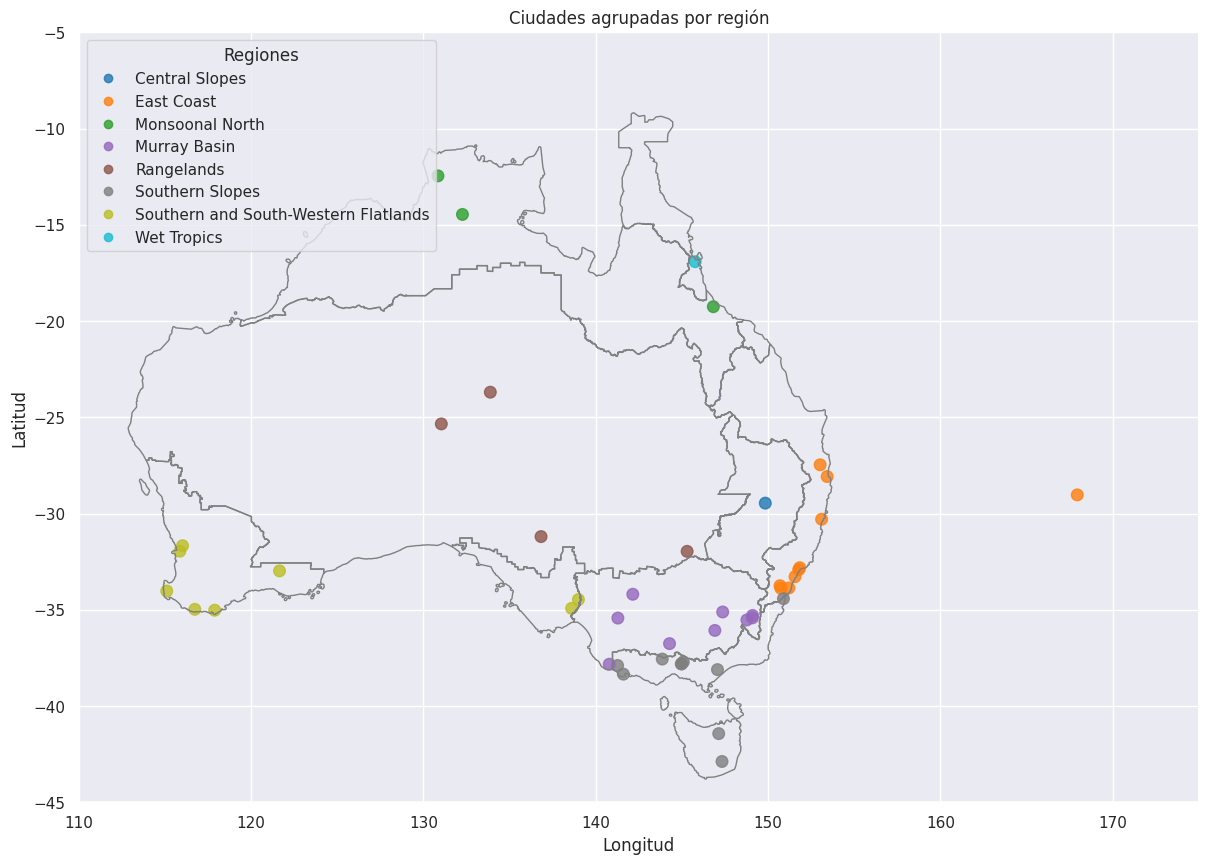

In [111]:
import matplotlib.pyplot as plt

# Asumiendo que gdf_clusters y df_ciudades_regiones ya están cargados.
# El mapeo de nombres a números de región
region_labels = sorted(df_ciudades_regiones['label'].unique())

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(18, 10))

# Graficar los polígonos del shapefile
gdf_clusters.boundary.plot(ax=ax, color="gray", linewidth=1)

# Graficar las ciudades usando el DataFrame de pandas y matplotlib
scatter = ax.scatter(
    df_ciudades_regiones['Longitude'], 
    df_ciudades_regiones['Latitude'], 
    c=df_ciudades_regiones['label'].astype('category').cat.codes, 
    cmap="tab10", 
    s=70, 
    alpha=0.8
)

# Añadir la leyenda con los nombres de las regiones
handles, _ = scatter.legend_elements()
ax.legend(handles, region_labels, loc="upper left", title="Regiones")

# Configurar el resto del gráfico
ax.set_title("Ciudades agrupadas por región")
ax.set_xlabel("Longitud")
ax.set_xlim(110, 175) 
ax.set_ylabel("Latitud")
ax.set_ylim(-45, -5) 

plt.show()

In [112]:
#  Seleccionar y renombrar la columna 'label' a 'region'
df_regiones = df_ciudades_regiones[['Location', 'label']].rename(columns={'label': 'region'})

# 2. Unir los dataframes
df_copy = pd.merge(df_copy, df_regiones, on='Location', how='left')

# Opcional: Verificar el resultado
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [113]:
df_copy["month"] = pd.to_datetime(df_copy["Date"]).dt.month

In [114]:
def stations(df_copy):
    if df_copy['month'] == 12 or df_copy['month'] == 1 or df_copy['month'] == 2:
        return 'summer'
    elif df_copy['month'] == 3 or df_copy['month'] == 4 or df_copy['month'] == 5:
        return 'autumn'
    elif df_copy['month'] == 6 or df_copy['month'] == 7 or df_copy['month'] == 8:
        return 'winter'
    else:
        return 'spring'

In [115]:
df_copy['season'] = df_copy.apply(stations, axis=1)

In [116]:
df_copy.drop(columns=['month'], inplace=True)

In [ ]:
# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first') # sparse_output=False to get a dense array

# Fit and transform the 'season' column
season_encoded = encoder.fit_transform(df_copy[['season', 'region']])

# Create a DataFrame with the encoded columns
season_df = pd.DataFrame(season_encoded, columns=encoder.get_feature_names_out(['season', 'region']), index=df_copy.index)

# Concatenate with the original DataFrame
df_copy = pd.concat([df_copy, season_df], axis=1)

# No dropeamos la columna de region para usarla mas adelante para imputar ciertas columnas
df_copy.drop(columns=['season'], inplace=True) 


In [128]:
# Diccionario de direcciones a ángulos en grados
wind_dir_map = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}

def add_all_wind_dirs_cyclic(df, colnames):
    """
    Convierte varias columnas de direcciones de viento a representaciones cíclicas
    (sin y cos). Agrega dos columnas nuevas por cada una.
    """
    for col in colnames:
        df[col + '_sin'] = df[col].map(wind_dir_map).apply(
            lambda x: np.sin(np.deg2rad(x)) if pd.notnull(x) else np.nan
        )
        df[col + '_cos'] = df[col].map(wind_dir_map).apply(
            lambda x: np.cos(np.deg2rad(x)) if pd.notnull(x) else np.nan
        )
    return df

In [120]:
cols_viento = ["WindDir3pm", "WindDir9am", "WindGustDir"]

df_copy = add_all_wind_dirs_cyclic(df_copy, cols_viento)

In [121]:
df_copy.drop(columns=['WindGustDir', 'WindDir3pm', 'WindDir9am'], axis=1, inplace=True)

In [127]:
df_copy.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Latitude', 'Longitude', 'season_spring', 'season_summer',
       'season_winter', 'region_East Coast', 'region_Monsoonal North',
       'region_Murray Basin', 'region_Rangelands', 'region_Southern Slopes',
       'region_Southern and South-Western Flatlands', 'region_Wet Tropics',
       'WindDir3pm_sin', 'WindDir3pm_cos', 'WindDir9am_sin', 'WindDir9am_cos',
       'WindGustDir_sin', 'WindGustDir_cos'],
      dtype='object')

In [124]:
pd.set_option('display.max_columns', None)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 38 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Date                                         142193 non-null  object 
 1   Location                                     142193 non-null  object 
 2   MinTemp                                      141556 non-null  float64
 3   MaxTemp                                      141871 non-null  float64
 4   Rainfall                                     140787 non-null  float64
 5   Evaporation                                  81350 non-null   float64
 6   Sunshine                                     74377 non-null   float64
 7   WindGustSpeed                                132923 non-null  float64
 8   WindSpeed9am                                 140845 non-null  float64
 9   WindSpeed3pm                                 139563 non-nul

# Split

In [210]:
X = df_copy.drop('RainTomorrow', axis=1)
y = df_copy['RainTomorrow']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
missing_values = X_train.isnull().sum()
total_rows = len(X_train)
missing_percent = (missing_values / total_rows) * 100
print("Missing Values Percentage:\n", missing_percent)

Missing Values Percentage:
 Date                0.000000
Location            0.000000
MinTemp             0.461522
MaxTemp             0.235596
Rainfall            1.039084
Evaporation        42.891679
Sunshine           47.774144
WindGustDir         6.556253
WindGustSpeed       6.510540
WindDir9am          7.064367
WindDir3pm          2.657489
WindSpeed9am        0.952054
WindSpeed3pm        1.854001
Humidity9am         1.248308
Humidity3pm         2.560789
Pressure9am         9.895916
Pressure3pm         9.867785
Cloud9am           37.836911
Cloud3pm           40.233310
Temp9am             0.647010
Temp3pm             1.939272
RainToday           1.039084
Latitude            0.000000
Longitude           0.000000
season_spring       0.000000
season_summer       0.000000
season_winter       0.000000
Region_1            0.000000
Region_2            0.000000
Region_3            0.000000
WindDir3pm_sin      2.657489
WindDir3pm_cos      2.657489
WindDir9am_sin      7.064367
WindDir9am_cos 

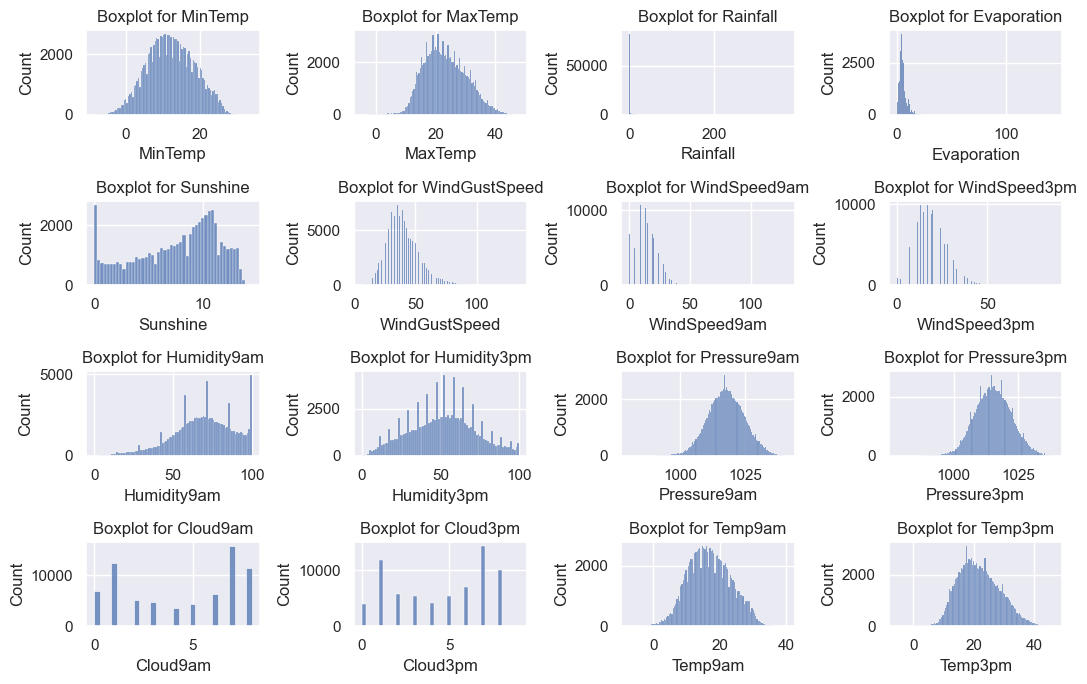

In [213]:
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
            'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

plt.figure(figsize=(11, 7))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(x=X_train[col])
    plt.title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

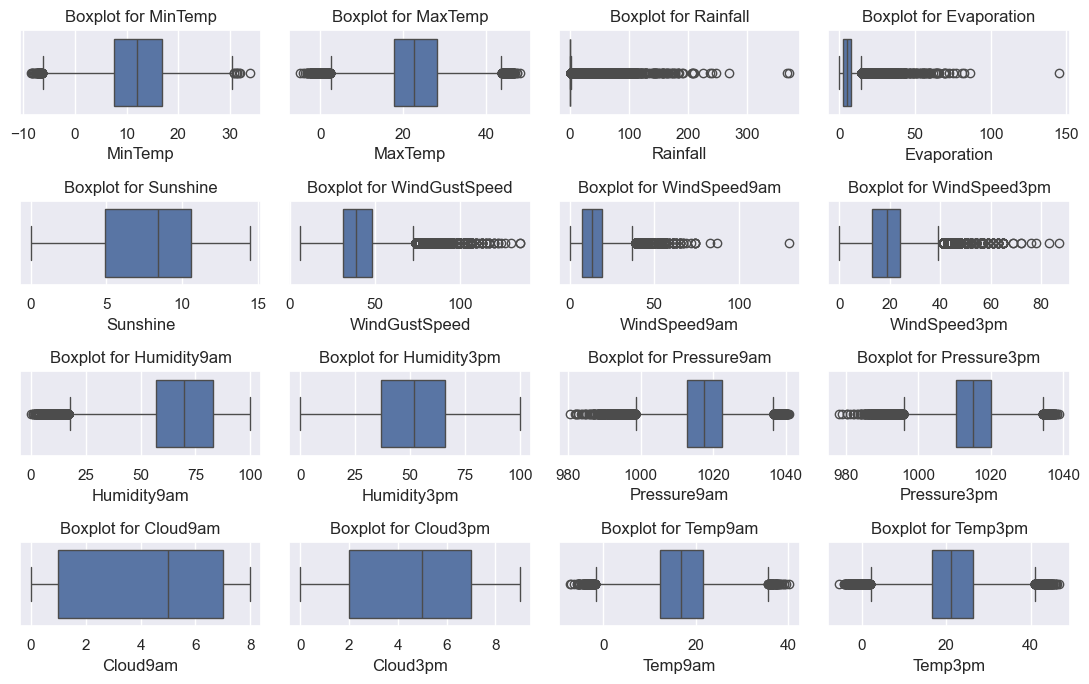

In [214]:
plt.figure(figsize=(11, 7))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=X_train[col])
    plt.title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

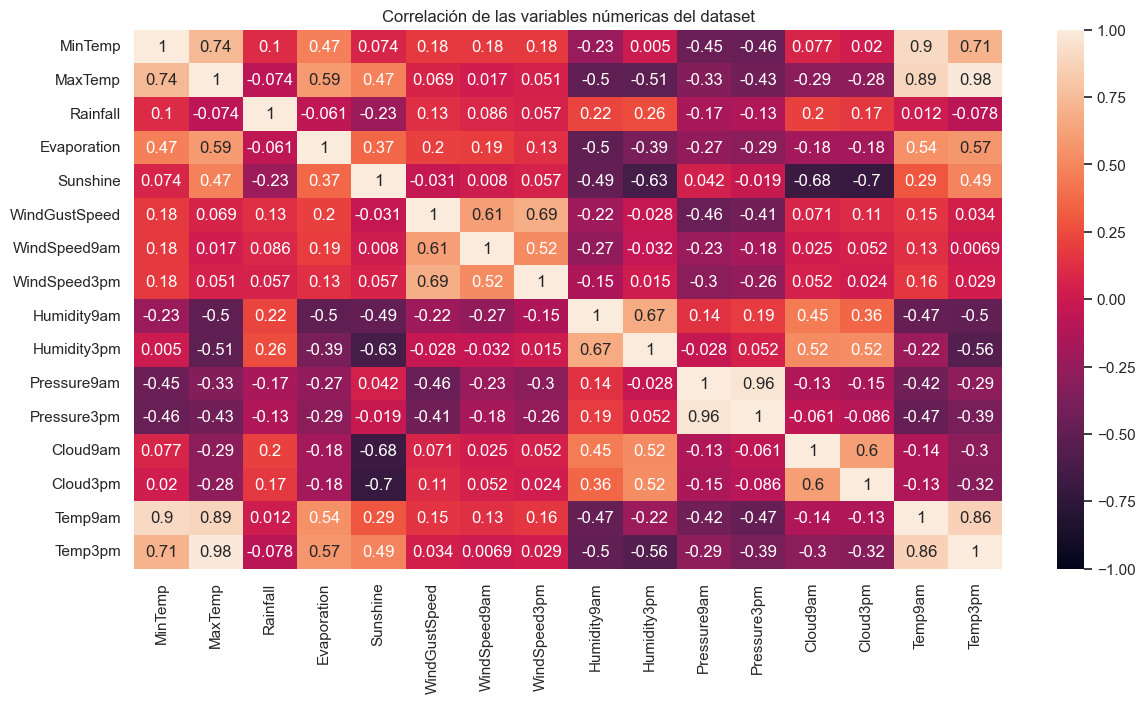

In [215]:
plt.figure(figsize=(14,7))
sns.heatmap(X_train[num_cols].corr(), vmax=1, vmin=-1, annot=True)
plt.title('Correlación de las variables númericas del dataset');

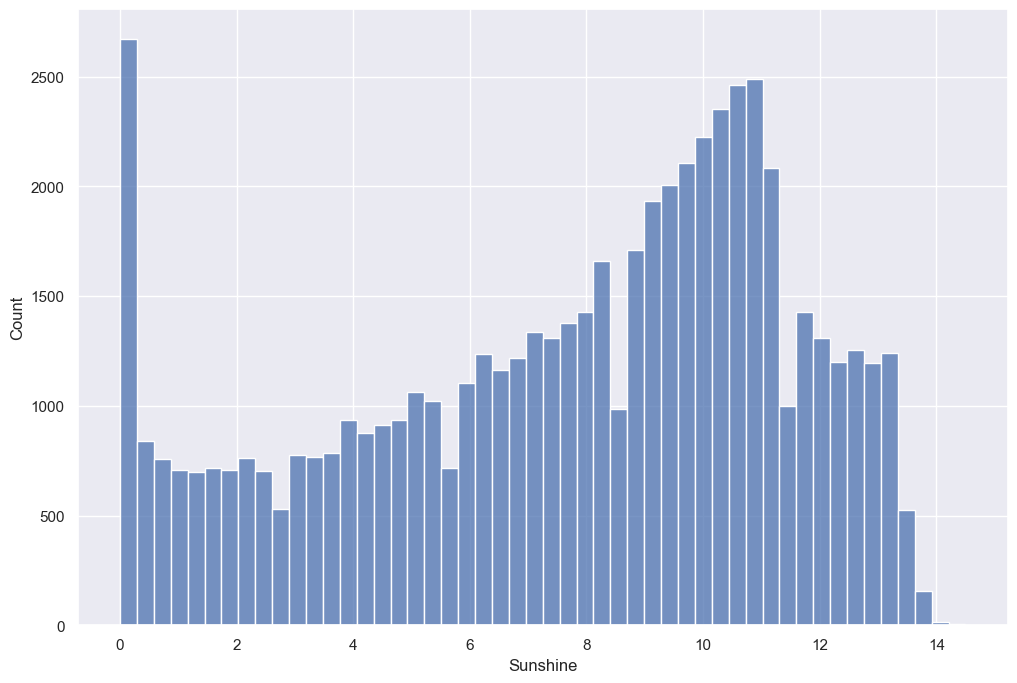

In [216]:
plt.figure(figsize=(12, 8))
sns.histplot(X_train['Sunshine'])
plt.show()

**sunshine y evaporación preguntar por imputación**

In [217]:
X_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,season_winter,Region_1,Region_2,Region_3,WindDir3pm_sin,WindDir3pm_cos,WindDir9am_sin,WindDir9am_cos,WindGustDir_sin,WindGustDir_cos
56320,2016-06-09,Ballarat,7.1,13.0,8.8,NaN,NaN,N,41.0,N,...,1.0,0.0,0.0,0.0,-0.923880,3.826834e-01,0.000000,1.000000e+00,0.000000,1.000000e+00
124136,2009-10-24,Walpole,13.2,18.3,0.0,NaN,NaN,E,48.0,ESE,...,0.0,1.0,0.0,0.0,0.923880,-3.826834e-01,0.923880,-3.826834e-01,1.000000,6.123234e-17
117063,2015-09-21,Perth,9.2,22.7,0.0,5.0,11.1,ENE,52.0,ENE,...,0.0,1.0,0.0,0.0,0.923880,-3.826834e-01,0.923880,3.826834e-01,0.923880,3.826834e-01
6974,2011-12-06,Cobar,15.3,26.1,0.0,10.4,NaN,E,44.0,E,...,0.0,0.0,0.0,0.0,0.707107,7.071068e-01,1.000000,6.123234e-17,1.000000,6.123234e-17
61546,2014-03-15,Sale,11.9,31.8,0.0,5.0,4.1,NW,72.0,E,...,0.0,0.0,0.0,0.0,0.000000,1.000000e+00,1.000000,6.123234e-17,-0.707107,7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58018,2012-08-08,Bendigo,2.7,9.7,0.0,NaN,NaN,NE,26.0,E,...,1.0,0.0,0.0,0.0,NaN,NaN,1.000000,6.123234e-17,0.707107,7.071068e-01
70923,2016-10-05,Mildura,5.0,22.9,3.4,5.5,10.8,WNW,41.0,NW,...,0.0,0.0,0.0,0.0,-0.923880,3.826834e-01,-0.707107,7.071068e-01,-0.923880,3.826834e-01
35190,2015-09-12,Sydney,11.2,26.1,0.0,7.4,10.4,E,31.0,NW,...,0.0,0.0,1.0,0.0,1.000000,6.123234e-17,-0.707107,7.071068e-01,1.000000,6.123234e-17
58118,2012-11-16,Bendigo,8.3,20.8,0.0,NaN,NaN,SSE,46.0,SE,...,0.0,0.0,0.0,0.0,0.382683,-9.238795e-01,0.707107,-7.071068e-01,0.382683,-9.238795e-01


In [218]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [219]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,season_winter,Region_1,Region_2,Region_3,WindDir3pm_sin,WindDir3pm_cos,WindDir9am_sin,WindDir9am_cos,WindGustDir_sin,WindGustDir_cos
17969,2009-10-14,Norah Head,15.1,23.9,0.0,NaN,NaN,SSW,67.0,NW,...,0.0,0.0,1.0,0.0,-1.000000,-1.836970e-16,-0.707107,7.071068e-01,-3.826834e-01,-0.923880
124769,2011-09-26,Walpole,9.7,14.2,7.6,NaN,NaN,WSW,50.0,WNW,...,0.0,1.0,0.0,0.0,-1.000000,-1.836970e-16,-0.923880,3.826834e-01,-9.238795e-01,-0.382683
39287,2010-04-20,Williamtown,13.2,25.4,0.0,3.2,8.8,ENE,30.0,W,...,0.0,0.0,1.0,0.0,1.000000,6.123234e-17,-1.000000,-1.836970e-16,9.238795e-01,0.382683
127749,2011-07-12,Hobart,7.6,14.8,0.0,4.0,7.0,WNW,94.0,WNW,...,1.0,0.0,0.0,0.0,-0.923880,3.826834e-01,-0.923880,3.826834e-01,-9.238795e-01,0.382683
40651,2015-04-13,Williamtown,12.9,22.2,0.0,4.0,7.9,S,37.0,SW,...,0.0,0.0,1.0,0.0,0.382683,-9.238795e-01,-0.707107,-7.071068e-01,1.224647e-16,-1.000000


In [220]:
X_train_scaled.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Latitude', 'Longitude', 'season_spring',
       'season_summer', 'season_winter', 'Region_1', 'Region_2', 'Region_3',
       'WindDir3pm_sin', 'WindDir3pm_cos', 'WindDir9am_sin', 'WindDir9am_cos',
       'WindGustDir_sin', 'WindGustDir_cos'],
      dtype='object')

In [221]:
X_train_scaled

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,season_winter,Region_1,Region_2,Region_3,WindDir3pm_sin,WindDir3pm_cos,WindDir9am_sin,WindDir9am_cos,WindGustDir_sin,WindGustDir_cos
17969,2009-10-14,Norah Head,0.456958,0.095135,-0.277289,NaN,NaN,SSW,1.992113,NW,...,0.0,0.0,1.0,0.0,-1.000000,-1.836970e-16,-0.707107,7.071068e-01,-3.826834e-01,-9.238795e-01
124769,2011-09-26,Walpole,-0.386956,-1.267578,0.620362,NaN,NaN,WSW,0.739796,WNW,...,0.0,1.0,0.0,0.0,-1.000000,-1.836970e-16,-0.923880,3.826834e-01,-9.238795e-01,-3.826834e-01
39287,2010-04-20,Williamtown,0.160025,0.305864,-0.277289,-0.536825,0.311616,ENE,-0.733519,W,...,0.0,0.0,1.0,0.0,1.000000,6.123234e-17,-1.000000,-1.836970e-16,9.238795e-01,3.826834e-01
127749,2011-07-12,Hobart,-0.715144,-1.183287,-0.277289,-0.347696,-0.164774,WNW,3.981087,WNW,...,1.0,0.0,0.0,0.0,-0.923880,3.826834e-01,-0.923880,3.826834e-01,-9.238795e-01,3.826834e-01
40651,2015-04-13,Williamtown,0.113141,-0.143691,-0.277289,-0.347696,0.073421,S,-0.217859,SW,...,0.0,0.0,1.0,0.0,0.382683,-9.238795e-01,-0.707107,-7.071068e-01,1.224647e-16,-1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,2012-09-01,Witchcliffe,-0.496352,-0.607295,1.210923,NaN,NaN,W,0.224136,WNW,...,0.0,1.0,0.0,0.0,-1.000000,-1.836970e-16,-0.923880,3.826834e-01,-1.000000e+00,-1.836970e-16
119879,2014-09-09,Perth,0.144397,-0.466809,0.077047,-1.009649,-1.408683,SW,-0.070527,SW,...,0.0,1.0,0.0,0.0,-1.000000,-1.836970e-16,-0.707107,-7.071068e-01,-7.071068e-01,-7.071068e-01
103694,2010-12-20,Woomera,-0.215047,0.319912,-0.277289,1.543601,1.423194,SSW,0.297801,SSW,...,0.0,0.0,0.0,0.0,0.382683,-9.238795e-01,-0.382683,-9.238795e-01,-3.826834e-01,-9.238795e-01
131932,2014-11-05,Launceston,-0.136907,-0.256080,-0.277289,NaN,NaN,ESE,-0.070527,SSE,...,0.0,0.0,0.0,0.0,0.707107,-7.071068e-01,0.382683,-9.238795e-01,9.238795e-01,-3.826834e-01


In [222]:
# Esto es crucial para que ffill funcione correctamente en un contexto de series temporales.
X_train.sort_values(by=['Date', 'Location'], inplace=True)

# 2. Iterar sobre cada columna y aplicar forward fill
for column in X_train.columns:
    # Aplicamos ffill a la columna.
    # Usamos el método .ffill() que es la sintaxis más moderna en pandas.
    X_train[column].ffill(inplace=True)

# 3. (Opcional pero recomendado) Aplicar un backward fill (bfill)
# Esto rellena los NaN que puedan haber quedado al principio del DataFrame.
for column in X_train.columns:
    X_train[column].bfill(inplace=True)

C:\Users\Nico\AppData\Local\Temp\ipykernel_9248\901378620.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[column].ffill(inplace=True)
C:\Users\Nico\AppData\Local\Temp\ipykernel_9248\901378620.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

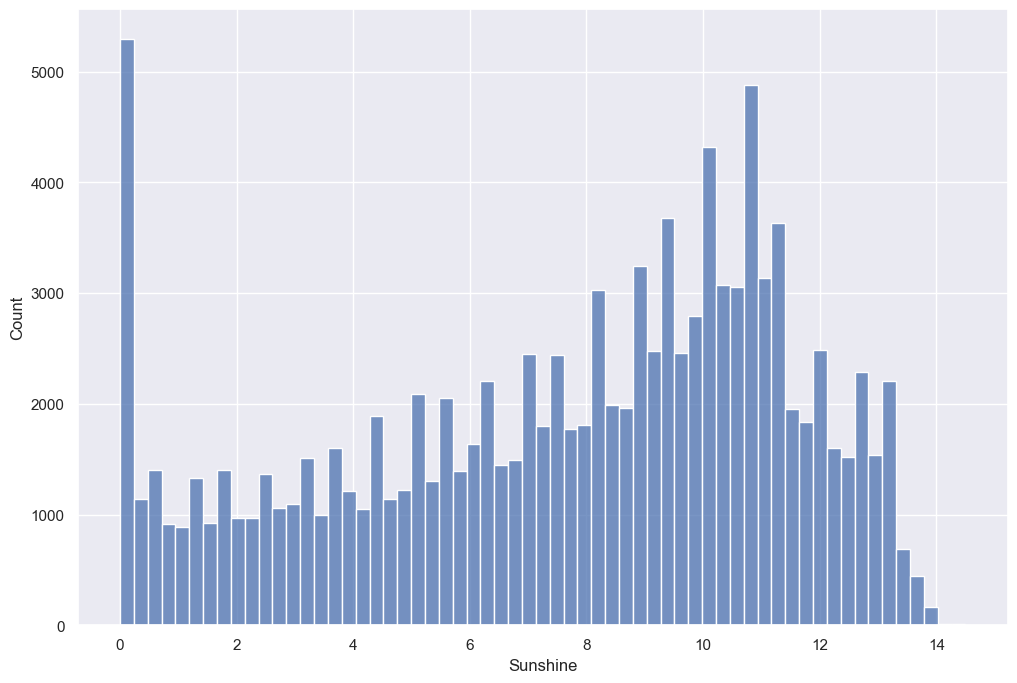

In [223]:
plt.figure(figsize=(12, 8))
sns.histplot(X_train['Sunshine'])
plt.show()

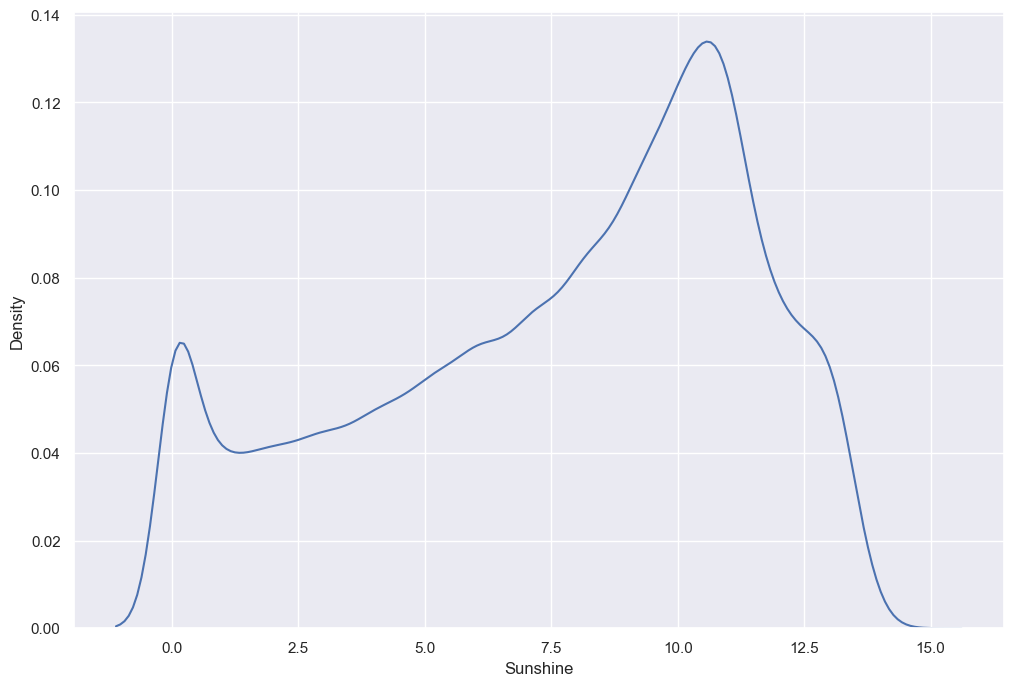

In [224]:
plt.figure(figsize=(12, 8))
sns.kdeplot(X_train['Sunshine'])
plt.show()

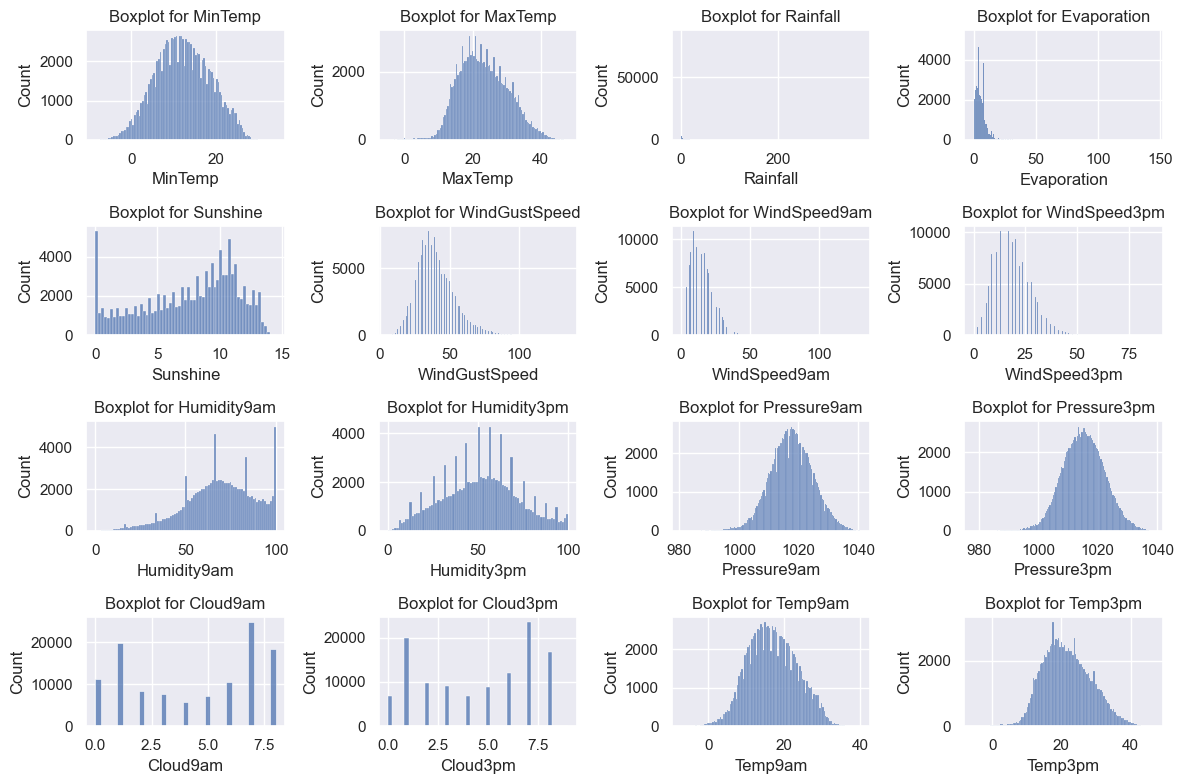

In [225]:
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
            'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(x=X_train[col])
    plt.title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()